In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Flatten

In [2]:
# Use data augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Do not use data augmentation for the test data
test_datagen = ImageDataGenerator(rescale=1/255)

In [3]:
train_data = train_datagen.flow_from_directory(
    'E:/multipleimages/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    'E:/multipleimages/test',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 7203 images belonging to 9 classes.
Found 1804 images belonging to 9 classes.


In [4]:
train_data.class_indices

{'image_0': 0,
 'image_1': 1,
 'image_2': 2,
 'image_3': 3,
 'image_4': 4,
 'image_5': 5,
 'image_6': 6,
 'image_7': 7,
 'pratik': 8}

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5)) # Add dropout regularization
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(9,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [7]:
# Use a smaller learning rate for the optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [8]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
# Train the model for more epochs
history = model.fit(train_data,epochs = 10, validation_data=test_data)

Epoch 1/10
226/226 [==============================] - 162s 713ms/step - loss: 0.4375 - accuracy: 0.8308 - val_loss: 0.0499 - val_accuracy: 0.9806
Epoch 2/10
226/226 [==============================] - 164s 724ms/step - loss: 0.0813 - accuracy: 0.9738 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/10
226/226 [==============================] - 161s 710ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/10
226/226 [==============================] - 158s 700ms/step - loss: 0.0726 - accuracy: 0.9764 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/10
226/226 [==============================] - 163s 722ms/step - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 6/10
226/226 [==============================] - 169s 746ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 9.5312e-06 - val_accuracy: 1.0000
Epoch 7/10
226/226 [==============================] - 165s 731ms/step - loss: 0.0483 - accuracy: 0.9875 - val_loss: 0.00

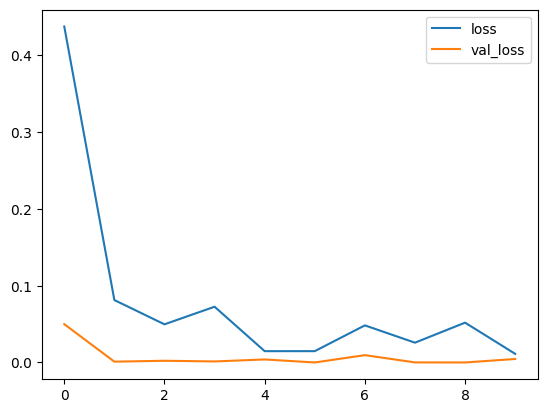

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [11]:
# model.save('main_faces.h5')

In [12]:
# fer_json = model.to_json()
# with open("main_faces1.json", "w") as json_file:
#     json_file.write(fer_json)